In [103]:
#import libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### data gathring:


In [105]:
#Read in the dataset and take a look at the top few rows here:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### data assessing and cleaning:

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [107]:
#Find the number of rows and columns in the dataset.
df.shape

(10866, 21)

In [108]:
#drop unwanted columns: 
df.drop(columns=['tagline', 'homepage', 'imdb_id', 'overview'],inplace=True)

In [109]:
df.drop(columns=['keywords'],inplace=True)
df.drop(columns=['production_companies','cast'],inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [111]:
#correct the wrong data type to a propper typ
df['release_date'] = pd.to_datetime(df['release_date'])

In [112]:
#How many missing values in the dataset? 
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [113]:
#drop null values
df.dropna(inplace=True)

In [114]:
#how many diplicated rows?
df.duplicated().sum()

1

In [115]:
#drop diplicated rows
df = df.drop_duplicates(keep=False)


In [116]:
#splitting genres column:
df['genres']=df['genres'].str.split('|', 1,expand=True)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


## Question 1: Which movie has the highest revenue ? 

In [117]:
top_10 = df.nlargest(10,'revenue')
top_10

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,102,Animation,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,Action,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


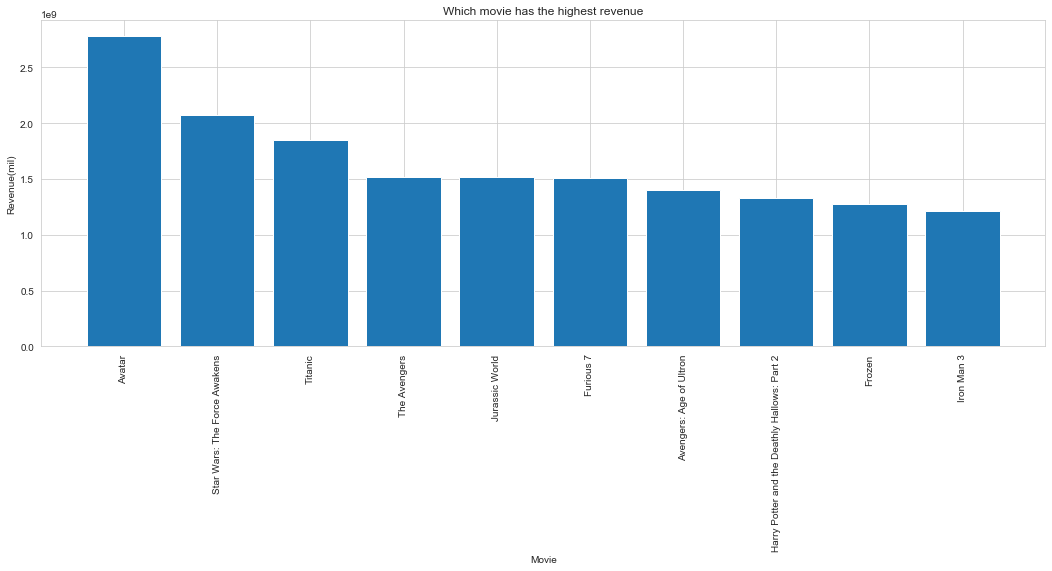

In [118]:
plt.figure(figsize=(18,6))
plt.xlabel('Movie')
plt.ylabel('Revenue(mil)')
plt.bar(top_10['original_title'],top_10['revenue'])
plt.xticks(rotation=90)
plt.title('Which movie has the highest revenue')
plt.show()

Finding: Avatar is the hifhest revenue 

## Question2 :Number of movies per year

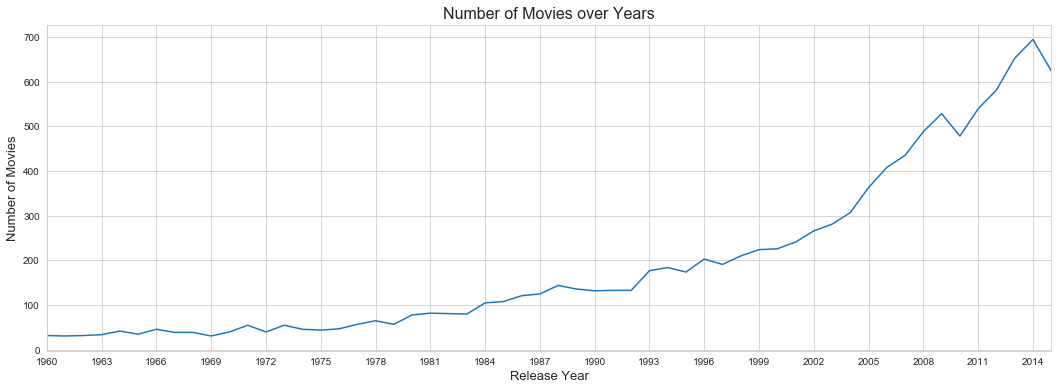

In [119]:
df.groupby('release_year').release_year.count()
df.groupby('release_year').release_year.count().plot(figsize=(18,6));
plt.title('Number of Movies over Years', fontsize = 16);
plt.xlabel('Release Year', fontsize = 13);
plt.ylabel('Number of Movies', fontsize = 13);
plt.xticks(range(1960, 2015, 3));
sb.set_style("whitegrid");


Finding:2014 has the most number of movies


## Question3: Which director is the most popular ? 

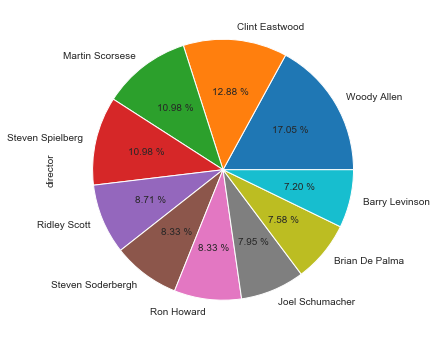

In [120]:
df3 = df['director'].value_counts()
df3 = df3.nlargest(10)
plt.figure(figsize=(18,6))

plt.pie(df3 , autopct='%.2f %%')

df3.plot.pie()

Finding:Woody allen is the most popular by 17.05%

# Conclusion:

In [122]:
#export the dataframe to csv file:


In [123]:
df.to_csv('findings.csv')